# Exercise 2 - State vectors, Bloch sphere and dice

## Remarks
* You will find all files used during lectures (slides, script, etc.) here: [Lecture documents](https://drive.google.com/drive/folders/1gOsoJPQwES4Dw5ieo_lQMXnGz5YC-Wy8?usp=share_link).
* There is a lot of content in this notebook. No worries, this will serve us for more than 1 lesson (probably for 1.5 lessons).

In [ ]:
# pre-installed qiskit version causes error in plot_bloch_multivector
%pip install --upgrade qiskit

## Exercise 2.1 - State vectors

Are these state vectors?
- In **yes** case, tell amplitudes, probabilities and draw the vector in Bloch sphere(s).
- In **no** case, find a slight modification to make it a state vector and proceed as in **yes** case.

1. $\begin{bmatrix}0.8\\0.2\end{bmatrix}$,
2. $H\lvert -\rangle$,
3. $\dfrac{1}{\sqrt{2}}\begin{bmatrix}1\\i\end{bmatrix}$,
4. $\dfrac{e^{i\pi}}{2}\begin{bmatrix}\sqrt{3}\\1\end{bmatrix}$,
5. $\dfrac{1}{\sqrt{2}}\begin{bmatrix}1\\1\\0\\0\end{bmatrix}$,
6. $\begin{bmatrix}1\\0\\0\\0\\0\\0\end{bmatrix}$.

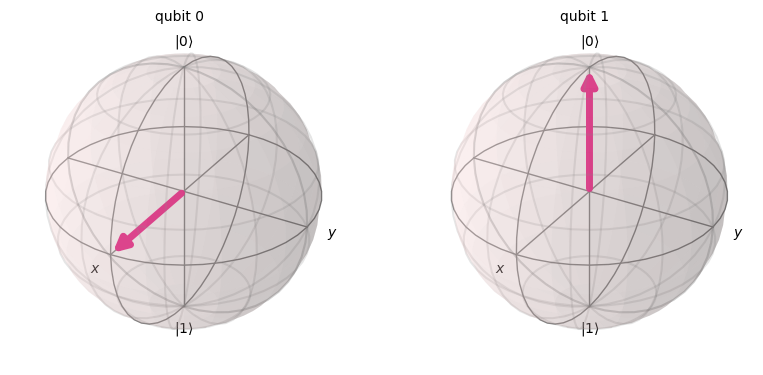

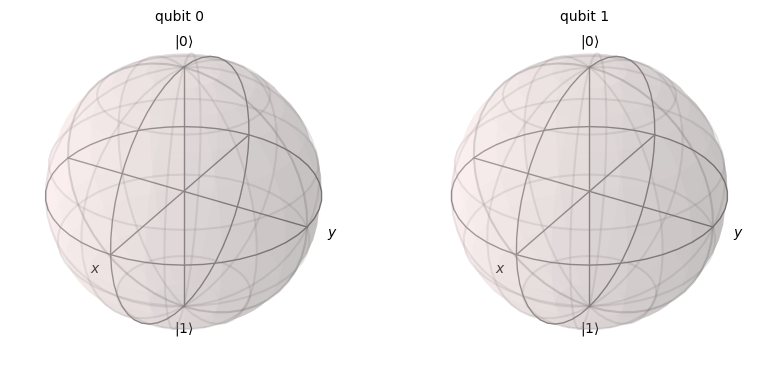

In [9]:
from qiskit.visualization import plot_bloch_multivector
from math import sqrt

display(plot_bloch_multivector([1/sqrt(2),1/sqrt(2),0,0]))
display(plot_bloch_multivector([1/sqrt(2),0,0,1/sqrt(2)]))

## Exercise 2.2 - Hadamard, a deeper look

Consider the Hadamard gate $H=\dfrac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$.
1. Discuss whether the Hadamard gate is unitary.
2. Let the state vector $\frac{\sqrt{3}}{2}\lvert 0\rangle+\frac{1}{2}\lvert 1\rangle$ be the input of an Hadamard gate. What is the output state vector?
3. Let the state vector $-\frac{1}{\sqrt{2}}\lvert 0\rangle-\frac{1}{\sqrt{2}}\lvert 1\rangle$ be the output of an Hadamard gate. What has been the input, is it uniquely determined?

## Exercise 2.3 - "Good teams have good rotation" (Joachim Low)

Consider the Rotation operator gate $R_y(\theta)=\begin{bmatrix}\cos(\theta/2)&-\sin(\theta/2)\\\sin(\theta/2)&\cos(\theta/2)\end{bmatrix}$.

1. Describe its effect on state vectors. Is there a geometrical interpretation?
2. Use $R_y(\theta)$ to solve questions 2 and 3 of Exercise 2.2 algorithmically by a quantum circuit.

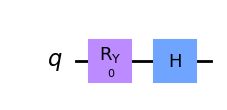

'Statevector([0.70710678+0.j, 0.70710678+0.j],\n            dims=(2,))'

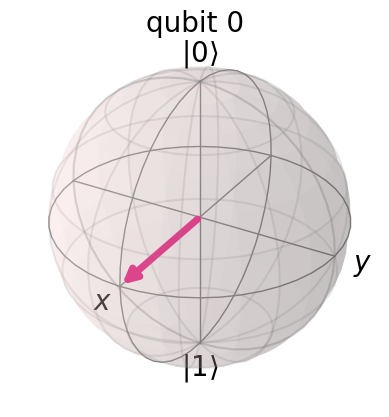

In [2]:
from qiskit.visualization import plot_bloch_multivector
from math import sqrt
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

theta = 0 # set theta to a better value

qc = QuantumCircuit(1)
qc.ry(theta, 0)
qc.h(0)
sv = Statevector(qc) # use the Statevector class to obtain the result

display(qc.draw(output='mpl'))
display(sv.draw())
display(sv.draw(output='bloch'))

## Exercise 2.4 - A quantum die simulator

__Alice__ wants to roll a die. At the moment, she does not have a die available. Being smart, she opens her wallet and takes out three coins (one cent, two cent, five cent). She uses coin tosses to simulate a die roll, using the following procedure:

1. Flip all three coins and interpret the results as bit word of length 3 (positions given by coin value) to obtain an integer number $x,\,0\le x\le 7$.
2. If $1\le x\le 6$, take $x$ as result of a die roll.
3. Otherwise, repeat the flips.

Assuming the coins are fair, would the die roll be fair as well? How likely is it, that we need to flip all coins at least 10 times get a die roll?

__Bob__ wants to roll a die. At the moment, he does not have a die available - but a quantum computer. Mimic Alice's procedure by a classical algorithm executing a quantum circuit with 3 qubits.

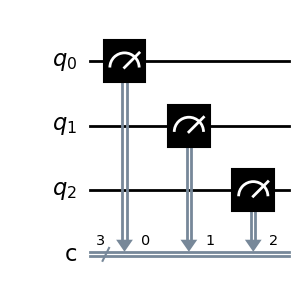

0

0

0

0

0

0

0

0

In [3]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

##################################
# extend / modify the code below #
##################################

def quantum_coins(qc, backend):
    job = backend.run(qc)
    result = job.result()
    counts = result.get_counts()
    return 0

def roll_die(qc, sim):
    return quantum_coins(qc, sim)

qc = QuantumCircuit(3, 3)
qc.measure([0,1,2], [0,1,2])
display(qc.draw(output='mpl'))

backend = AerSimulator(shots=1)

for _ in range(8):
    display(roll_die(qc, backend))

## Exercise 2.5 - A fully fledged quantum die simulator

__Warning__: This exercise is complicated and should be taken by die hard puzzlers only.

Consider the setting of Exercise 3.4.

__Charlie__ also wants to roll a die. At the moment, he also does not have a die available - but a quantum computer. In contrary to __Bob__ he has formed the opinion that hybrid algorithms suck. Help __Charlie__ to develop a pure quantum algorithm that mimics the roll of a die.

Recipe:
1. Use $R_y(\theta)$ (on qubit 0) to create a state that is a superposition of 2 basis states, one with measurement proability $\dfrac{1}{3}$, one with measurement probability $\dfrac{2}{3}$.
2. Use a controlled Hadamard gate (control on qubit 0, target on qubit 1) to decompose the latter basis state into two other basis states of equal probability. Thus, having created a state that is a superposition of 3 basis states, each with measurement probability $\dfrac{1}{3}$.
3. Use an Hadamard gate (on qubit 2) to further decompose the state into a superposition of 6 basis states, each with measurement probability $\dfrac{1}{6}$.
4. Apply Toffoli gates ($CCX$ gate, i.e. $NOT$ with 2 controls) to shift the basis states to the set $\{\lvert 001\rangle,\lvert 010\rangle,\lvert 011\rangle,\lvert 100\rangle,\lvert 101\rangle,\lvert 110\rangle\}$.

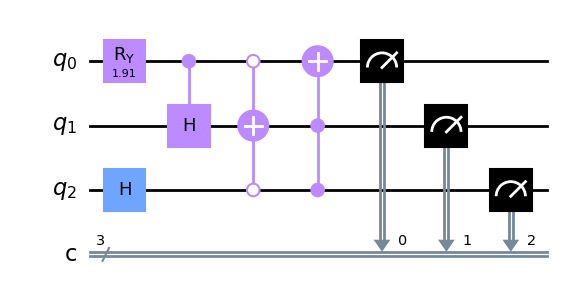

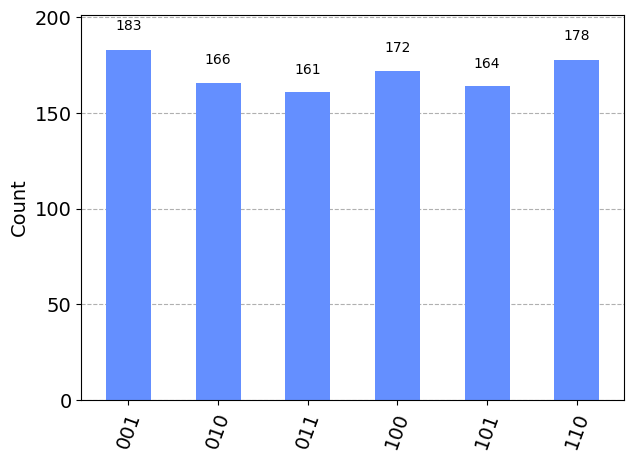

In [12]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from qiskit.circuit.library import XGate
from math import acos,atan,sqrt # might be useful

##################################
# extend / modify the code below #
##################################

qc = QuantumCircuit(3,3)
qc.ry(2 * atan(sqrt(2)), 0) # find the right angle
qc.ch(0,1)
qc.h(2)
qc.ccx(0,2,1,'00')
qc.ccx(1,2,0)

qc.measure([0,1,2],[0,1,2])
display(qc.draw(output='mpl'))

backend = AerSimulator(shots=1024)
job = backend.run(transpile(qc, backend)) # transpilation necessary for usage of ch and ccx gates
result = job.result()
counts = result.get_counts()

display(plot_histogram(counts))